## Training Study: Assay Model Architecture Exploration

This script performs model training experiments to study the effect of convolutional layer depth and dense neuron count using specified assay datasets.
It includes dataset preparation and systematic testing of different architectural configurations, producing metrics for comparison.

In [1]:
from ipynb.fs.full.data_training import *  # Custom module for training models
from activity_constants import *           # Constants such as paths, filenames, etc.

2025-06-05 17:15:55.092278: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-05 17:15:55.538828: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-05 17:15:56.444704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/oracle/11.2/client64/lib
2025-06-05 17:15:56.445111: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so

In [2]:
########################################################################
# Clears the current Keras backend session to avoid clutter from old models.
########################################################################
K.clear_session()

In [3]:
########################################################################
# get_dataset_layer_study: Constructs model names and output paths based 
# on input parameters, and triggers the training process using those settings.
#
# Inputs:
#   - p_assay: List of assay IDs.
#   - p_output_subfolder: Subfolder for saving results.
#   - dataset: Tuple of train/validation/test data.
#   - p_epocs: Number of training epochs.
#   - p_conv_extr: List of convolutional layers [filters, kernel_size].
#   - p_dense: List of dense layers [units, dropout].
#   - p_metrics: Evaluation metrics (default: acc, precision, recall, f1).
########################################################################
def get_dataset_layer_study(p_assay, p_output_subfolder, dataset, p_epocs, p_conv_extr, p_dense#, p_metrics = ['acc']):
                              , p_metrics = ['acc'
                               , precision
                               , recall
                               , f1
                                           ] 
                           ):
    
    assay_item_name = 'model_'
    assay_codes = ''
    for assay in p_assay:
        if (len(assay_codes) > 0):
            assay_codes = assay_codes + '#'
        assay_codes = assay_codes + (str)(assay)
        
    assay_item_name =  assay_item_name + assay_codes    
    for conv_extr in p_conv_extr:
      assay_item_name =  assay_item_name + '#{0}_{1}'.format(conv_extr[0], conv_extr[1])
        
    assay_item_name =  assay_item_name + '#'
    for dense in p_dense:
      assay_item_name =  assay_item_name + '#{0}_{1}'.format(dense[0], dense[1])
    
    print ('Creating model {0}'.format(assay_item_name))
    
    output_folder = model_folder
    
    if (len(p_output_subfolder)>0):
        output_folder = output_folder + '/' + p_output_subfolder
        
    print ('Output folder {0}'.format(output_folder))
    
    print ('''train_assay_model({}
                    , {}
                    , {}
                    , {}
                    , {}
                    , {}
                    , {}
                    , {}
                    , {}
                     )'''.format(data_set_folder
                    , p_assay
                    , output_folder
                    , 1
                    ,  p_epocs
                    , p_metrics
                    , assay_item_name
                    , p_conv_extr
                    , p_dense))
    
    train_assay_model(data_set_folder
                    , p_assay
                    , output_folder
                    , dataset
                    , 1
                    , p_epochs = p_epocs
                    , p_metrix_list=p_metrics
                    , p_assay_item_name = assay_item_name
                    , p_conv_extr = p_conv_extr
                    , p_dense = p_dense                  
                     )
    


In [4]:
########################################################################
# get_dataset_layer_study_standard: Automates training over multiple
# convolutional depths with fixed dense layers.
#
# Inputs:
#   - assay: Assay ID.
#   - p_output_subfolder: Subfolder name for output.
#   - dataset: Training/validation/test data.
#   - p_epocs: Number of training epochs.
#   - p_filter_size: Kernel size for conv layers.
########################################################################
def get_dataset_layer_study_standard(assay, p_output_subfolder, dataset, p_epocs , p_filter_size):
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, p_filter_size]], p_dense=[[128, 0]])
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, p_filter_size], [32, p_filter_size]], p_dense=[[128, 0]])
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, p_filter_size], [32, p_filter_size], [64, p_filter_size]], p_dense=[[128, 0]])
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, p_filter_size], [32, p_filter_size], [64, p_filter_size], [128, p_filter_size]], p_dense=[[128, 0]])
    

In [5]:
########################################################################
# Dataset loading and preparation.
########################################################################
dataset_folder = get_assay_folder_dataset_name(data_set_folder, prefix_dataset_folder, [1806])
x_train, y_train, x_val, y_val, x_test, y_test = get_data_from_files (dataset_folder, dataRegionEspFromX, dataRegionEspFromY, dataRegionEspNumColumns, dataRegionEspNumRows, 1, None)
dataset = [x_train, y_train, x_val, y_val, x_test, y_test]

[ 06/05/2025, 17:15:58 ]: Loading ModelDataset/dataset_1806/training
[ 06/05/2025, 17:19:38 ]: Loading ModelDataset/dataset_1806/validation
[ 06/05/2025, 17:22:27 ]: Loading ModelDataset/dataset_1806/test


In [6]:
########################################################################
# Run convolutional layer depth study (study_layer).
########################################################################
study_name = 'study_layer'
global_overview_folder = model_folder + '/' + study_name
create_global_overview_file (global_overview_folder)

Creating model model_1806#16_3##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_3##128_0
                    , [[16, 3]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 17:22:50 ]: Training dataset for assays [1806]
[ 06/05/2025, 17:22:50 ]: Creating model
[ 06/05/2025, 17:22:50 ]: x = layers.Conv2D(16, 3, activation='relu')(img_input) 


2025-06-05 17:22:50.194073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-05 17:22:50.281123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-05 17:22:50.281314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-06-05 17:22:50.288615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[ 06/05/2025, 17:22:54 ]: x = layers.Dense(128, activation='relu')(x) 
[ 06/05/2025, 17:22:54 ]: Getting datasets from ModelDataset/dataset_1806
[ 06/05/2025, 17:22:54 ]: Fitting the model for (4594, 295, 1350, 1)


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
2025-06-05 17:23:45.737744: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 7318242000 exceeds 10% of free system memory.
2025-06-05 17:24:26.199660: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 7318242000 exceeds 10% of free system memory.


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unexpected EOF while parsing (<unknown>, line 1)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the b

2025-06-05 17:24:32.219114: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2025-06-05 17:24:32.646485: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


307/307 [==============================] - ETA: 0s - loss: 2.3998 - acc: 0.9079 - precision: 0.2179 - recall: 0.1966 - f1: 0.1848

2025-06-05 17:25:55.650174: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5223447000 exceeds 10% of free system memory.
2025-06-05 17:26:17.783940: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 5223447000 exceeds 10% of free system memory.


307/307 [==============================] - 119s 378ms/step - loss: 2.3998 - acc: 0.9079 - precision: 0.2179 - recall: 0.1966 - f1: 0.1848 - val_loss: 0.1506 - val_acc: 0.9597 - val_precision: 0.0274 - val_recall: 0.0043 - val_f1: 0.0072
Epoch 2/5
307/307 [==============================] - 16s 50ms/step - loss: 0.1079 - acc: 0.9643 - precision: 0.5776 - recall: 0.5040 - f1: 0.5232 - val_loss: 0.1568 - val_acc: 0.9570 - val_precision: 0.0320 - val_recall: 0.0024 - val_f1: 0.0045
Epoch 3/5
307/307 [==============================] - 15s 50ms/step - loss: 0.0285 - acc: 0.9924 - precision: 0.7166 - recall: 0.7001 - f1: 0.7046 - val_loss: 0.1769 - val_acc: 0.9414 - val_precision: 0.0441 - val_recall: 0.0112 - val_f1: 0.0176
Epoch 4/5
307/307 [==============================] - 15s 50ms/step - loss: 0.0068 - acc: 0.9985 - precision: 0.7280 - recall: 0.7258 - f1: 0.7262 - val_loss: 0.2390 - val_acc: 0.9518 - val_precision: 0.0388 - val_recall: 0.0057 - val_f1: 0.0098
Epoch 5/5
307/307 [=========

2025-06-05 17:27:34.327525: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 611712000 exceeds 10% of free system memory.


12/12 [==============================] - 0s 21ms/step - loss: 0.4541 - acc: 0.9453 - precision: 0.0833 - recall: 0.0038 - f1: 0.0072
[ 06/05/2025, 17:27:35 ]: Saving model in  Model/study_layer/model_1806#16_3##128_0.h5
12/12 [==============================] - 0s 17ms/step
[ 06/05/2025, 17:27:41 ]: Model creation finished
[ 06/05/2025, 17:27:41 ]: Clear keras session
[ 06/05/2025, 17:27:41 ]: Purge memory for model
[ 06/05/2025, 17:27:41 ]: Purge memory for x_train
[ 06/05/2025, 17:27:41 ]: Purge memory for y_train
[ 06/05/2025, 17:27:41 ]: Purge memory for x_val
[ 06/05/2025, 17:27:41 ]: Purge memory for y_val
[ 06/05/2025, 17:27:41 ]: Purge memory for x_test
[ 06/05/2025, 17:27:41 ]: Purge memory for y_test
[ 06/05/2025, 17:27:41 ]: Recollect free memory
Creating model model_1806#16_3#32_3##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
          

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 96s 284ms/step - loss: 1.0012 - acc: 0.9186 - precision: 0.2527 - recall: 0.1937 - f1: 0.2008 - val_loss: 0.1419 - val_acc: 0.9625 - val_precision: 0.0411 - val_recall: 0.0073 - val_f1: 0.0120
Epoch 2/5
307/307 [==============================] - 16s 52ms/step - loss: 0.1123 - acc: 0.9641 - precision: 0.5581 - recall: 0.5052 - f1: 0.5182 - val_loss: 0.1488 - val_acc: 0.9619 - val_precision: 0.0411 - val_recall: 0.0067 - val_f1: 0.0111
Epoch 3/5
307/307 [==============================] - 16s 52ms/step - loss: 0.0458 - acc: 0.9861 - precision: 0.6824 - recall: 0.6707 - f1: 0.6674 - val_loss: 0.2008 - val_acc: 0.9274 - val_precision: 0.0457 - val_recall: 0.0209 - val_f1: 0.0283
Epoch 4/5
307/307 [==============================] - 16s 52ms/step - loss: 0.0171 - acc: 0.9965 - precision: 0.7557 - recall: 0.7533 - f1: 0.7522 - val_loss: 0.2344 - val_acc: 0.9594 - val_precision: 0.0457 - val_recall: 0.0106 - val_f1: 0.0166
Epoch 5/5
12/12 [==

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 108s 320ms/step - loss: 0.4883 - acc: 0.9110 - precision: 0.1669 - recall: 0.1435 - f1: 0.1368 - val_loss: 0.1567 - val_acc: 0.9594 - val_precision: 0.0274 - val_recall: 0.0040 - val_f1: 0.0068
Epoch 2/5
307/307 [==============================] - 16s 52ms/step - loss: 0.1524 - acc: 0.9504 - precision: 0.4953 - recall: 0.4421 - f1: 0.4479 - val_loss: 0.1386 - val_acc: 0.9652 - val_precision: 0.0457 - val_recall: 0.0124 - val_f1: 0.0188
Epoch 3/5
307/307 [==============================] - 16s 53ms/step - loss: 0.0798 - acc: 0.9732 - precision: 0.6377 - recall: 0.6002 - f1: 0.6032 - val_loss: 0.1878 - val_acc: 0.9600 - val_precision: 0.0457 - val_recall: 0.0127 - val_f1: 0.0193
Epoch 4/5
307/307 [==============================] - 17s 54ms/step - loss: 0.0368 - acc: 0.9917 - precision: 0.7104 - recall: 0.6953 - f1: 0.6974 - val_loss: 0.2782 - val_acc: 0.9610 - val_precision: 0.0457 - val_recall: 0.0137 - val_f1: 0.0203
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 109s 350ms/step - loss: 0.2894 - acc: 0.9110 - precision: 0.0075 - recall: 0.0090 - f1: 0.0061 - val_loss: 0.3042 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 33s 107ms/step - loss: 0.2024 - acc: 0.9277 - precision: 0.2182 - recall: 0.1574 - f1: 0.1755 - val_loss: 0.2043 - val_acc: 0.9530 - val_precision: 0.0457 - val_recall: 0.0148 - val_f1: 0.0221
Epoch 3/5
307/307 [==============================] - 16s 53ms/step - loss: 0.1676 - acc: 0.9471 - precision: 0.3893 - recall: 0.2995 - f1: 0.3249 - val_loss: 0.2671 - val_acc: 0.9591 - val_precision: 0.0320 - val_recall: 0.0030 - val_f1: 0.0055
Epoch 4/5
307/307 [==============================] - 17s 54ms/step - loss: 0.1464 - acc: 0.9549 - precision: 0.5110 - recall: 0.4441 - f1: 0.4596 - val_loss: 0.1854 - val_acc: 0.9622 - val_precision: 0.0457 - val_recall: 0.0079 - val_f1: 0.0129
Epoch

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_5##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_5##128_0
                    , [[16, 5]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 17:41:55 ]: Training dataset for assays [1806]
[ 06/05/2025, 17:41:55 ]: Creating model
[ 06/05/2025, 17:41:55 ]: x = layers.Conv2D(16, 5, activation='relu')(img_input) 
[ 06/05/2025, 17:41:55 ]: x = layers.Dense(128, activation='relu')(x) 
[ 06/05/2025, 17:41:55 ]: Getting datasets from ModelDataset/dataset_1806
[ 06/05/2025, 17:41:55 ]: Fitting the model for (4594, 295, 1350, 1)


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 119s 384ms/step - loss: 1.1009 - acc: 0.9134 - precision: 0.1789 - recall: 0.1469 - f1: 0.1466 - val_loss: 0.1471 - val_acc: 0.9619 - val_precision: 0.0411 - val_recall: 0.0076 - val_f1: 0.0124
Epoch 2/5
307/307 [==============================] - 16s 51ms/step - loss: 0.1265 - acc: 0.9560 - precision: 0.5082 - recall: 0.4352 - f1: 0.4506 - val_loss: 0.1476 - val_acc: 0.9604 - val_precision: 0.0320 - val_recall: 0.0049 - val_f1: 0.0083
Epoch 3/5
307/307 [==============================] - 15s 50ms/step - loss: 0.0533 - acc: 0.9830 - precision: 0.6781 - recall: 0.6463 - f1: 0.6513 - val_loss: 0.2565 - val_acc: 0.9570 - val_precision: 0.0137 - val_recall: 0.0012 - val_f1: 0.0022
Epoch 4/5
307/307 [==============================] - 16s 51ms/step - loss: 0.0133 - acc: 0.9974 - precision: 0.7210 - recall: 0.7219 - f1: 0.7202 - val_loss: 0.2351 - val_acc: 0.9600 - val_precision: 0.0411 - val_recall: 0.0076 - val_f1: 0.0124
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 183s 594ms/step - loss: 0.3975 - acc: 0.9219 - precision: 0.2334 - recall: 0.1931 - f1: 0.1967 - val_loss: 0.3419 - val_acc: 0.9567 - val_precision: 0.0046 - val_recall: 3.0441e-04 - val_f1: 5.7078e-04
Epoch 2/5
307/307 [==============================] - 18s 59ms/step - loss: 0.1272 - acc: 0.9613 - precision: 0.5466 - recall: 0.4855 - f1: 0.4987 - val_loss: 0.1604 - val_acc: 0.9570 - val_precision: 0.0457 - val_recall: 0.0124 - val_f1: 0.0191
Epoch 3/5
307/307 [==============================] - 18s 59ms/step - loss: 0.0434 - acc: 0.9865 - precision: 0.6857 - recall: 0.6667 - f1: 0.6688 - val_loss: 0.1692 - val_acc: 0.9600 - val_precision: 0.0457 - val_recall: 0.0134 - val_f1: 0.0198
Epoch 4/5
307/307 [==============================] - 18s 59ms/step - loss: 0.0161 - acc: 0.9956 - precision: 0.7326 - recall: 0.7343 - f1: 0.7318 - val_loss: 0.2349 - val_acc: 0.9244 - val_precision: 0.0438 - val_recall: 0.0206 - val_f1: 0.0273
Epoch 5/5


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 134s 434ms/step - loss: 0.4312 - acc: 0.9153 - precision: 0.1359 - recall: 0.1162 - f1: 0.1174 - val_loss: 0.1637 - val_acc: 0.9622 - val_precision: 0.0457 - val_recall: 0.0088 - val_f1: 0.0142
Epoch 2/5
307/307 [==============================] - 19s 63ms/step - loss: 0.1705 - acc: 0.9480 - precision: 0.4563 - recall: 0.4009 - f1: 0.4056 - val_loss: 0.1956 - val_acc: 0.9552 - val_precision: 0.0457 - val_recall: 0.0158 - val_f1: 0.0229
Epoch 3/5
307/307 [==============================] - 19s 63ms/step - loss: 0.0935 - acc: 0.9708 - precision: 0.6026 - recall: 0.5717 - f1: 0.5705 - val_loss: 0.1942 - val_acc: 0.9494 - val_precision: 0.0457 - val_recall: 0.0164 - val_f1: 0.0233
Epoch 4/5
307/307 [==============================] - 19s 63ms/step - loss: 0.0454 - acc: 0.9848 - precision: 0.6739 - recall: 0.6824 - f1: 0.6693 - val_loss: 0.1838 - val_acc: 0.9604 - val_precision: 0.0457 - val_recall: 0.0146 - val_f1: 0.0212
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 122s 373ms/step - loss: 0.4687 - acc: 0.9077 - precision: 0.0560 - recall: 0.0464 - f1: 0.0438 - val_loss: 0.1727 - val_acc: 0.9475 - val_precision: 0.0320 - val_recall: 0.0037 - val_f1: 0.0064
Epoch 2/5
307/307 [==============================] - 21s 67ms/step - loss: 0.2275 - acc: 0.9299 - precision: 0.3141 - recall: 0.2353 - f1: 0.2525 - val_loss: 0.1610 - val_acc: 0.9594 - val_precision: 0.0457 - val_recall: 0.0109 - val_f1: 0.0170
Epoch 3/5
307/307 [==============================] - 20s 64ms/step - loss: 0.1879 - acc: 0.9393 - precision: 0.3776 - recall: 0.2866 - f1: 0.3125 - val_loss: 0.1687 - val_acc: 0.9619 - val_precision: 0.0457 - val_recall: 0.0103 - val_f1: 0.0163
Epoch 4/5
307/307 [==============================] - 20s 65ms/step - loss: 0.1546 - acc: 0.9502 - precision: 0.4889 - recall: 0.4216 - f1: 0.4354 - val_loss: 0.2482 - val_acc: 0.8942 - val_precision: 0.0449 - val_recall: 0.0269 - val_f1: 0.0335
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 114s 359ms/step - loss: 1.4876 - acc: 0.9145 - precision: 0.2172 - recall: 0.1498 - f1: 0.1627 - val_loss: 0.1827 - val_acc: 0.9594 - val_precision: 0.0274 - val_recall: 0.0037 - val_f1: 0.0063
Epoch 2/5
307/307 [==============================] - 16s 53ms/step - loss: 0.1647 - acc: 0.9482 - precision: 0.4354 - recall: 0.3262 - f1: 0.3580 - val_loss: 0.3417 - val_acc: 0.8765 - val_precision: 0.0420 - val_recall: 0.0158 - val_f1: 0.0226
Epoch 3/5
307/307 [==============================] - 16s 52ms/step - loss: 0.1150 - acc: 0.9617 - precision: 0.5700 - recall: 0.4853 - f1: 0.5063 - val_loss: 0.2061 - val_acc: 0.9488 - val_precision: 0.0457 - val_recall: 0.0088 - val_f1: 0.0144
Epoch 4/5
307/307 [==============================] - 16s 52ms/step - loss: 0.0606 - acc: 0.9808 - precision: 0.6721 - recall: 0.6148 - f1: 0.6313 - val_loss: 0.2502 - val_acc: 0.9384 - val_precision: 0.0411 - val_recall: 0.0085 - val_f1: 0.0136
Epoch 5/5
12/12 [=

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_7#32_7##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_7#32_7##128_0
                    , [[16, 7], [32, 7]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 18:09:28 ]: Training dataset for assays [1806]
[ 06/05/2025, 18:09:28 ]: Creating model
[ 06/05/2025, 18:09:28 ]: x = layers.Conv2D(16, 7, activation='relu')(img_input) 
[ 06/05/2025, 18:09:28 ]: x = layers.Conv2D(32, 7, activation='relu')(img_input) 
[ 06/05/2025, 18:09:28 ]: x = layers.Dense(128, activation='relu')(x) 
[ 06/05/2025, 18:09:28 ]: Getting datasets from ModelDataset/dataset_1806
[ 06/05/2025, 18:09:28 ]: Fitting the model for (4594, 295, 1350, 1)


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 187s 593ms/step - loss: 0.5125 - acc: 0.9203 - precision: 0.2729 - recall: 0.2211 - f1: 0.2294 - val_loss: 0.1534 - val_acc: 0.9625 - val_precision: 0.0457 - val_recall: 0.0100 - val_f1: 0.0158
Epoch 2/5
307/307 [==============================] - 25s 78ms/step - loss: 0.1129 - acc: 0.9708 - precision: 0.5912 - recall: 0.5613 - f1: 0.5634 - val_loss: 0.1742 - val_acc: 0.9613 - val_precision: 0.0411 - val_recall: 0.0094 - val_f1: 0.0149
Epoch 3/5
307/307 [==============================] - 20s 66ms/step - loss: 0.0438 - acc: 0.9865 - precision: 0.6858 - recall: 0.6748 - f1: 0.6724 - val_loss: 0.2256 - val_acc: 0.9637 - val_precision: 0.0457 - val_recall: 0.0103 - val_f1: 0.0164
Epoch 4/5
307/307 [==============================] - 21s 68ms/step - loss: 0.0235 - acc: 0.9952 - precision: 0.7345 - recall: 0.7364 - f1: 0.7333 - val_loss: 0.2803 - val_acc: 0.9543 - val_precision: 0.0457 - val_recall: 0.0142 - val_f1: 0.0211
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 178s 576ms/step - loss: 1.3173 - acc: 0.9027 - precision: 0.0761 - recall: 0.0565 - f1: 0.0545 - val_loss: 0.1921 - val_acc: 0.9567 - val_precision: 0.0046 - val_recall: 3.0441e-04 - val_f1: 5.7078e-04
Epoch 2/5
307/307 [==============================] - 22s 73ms/step - loss: 0.2027 - acc: 0.9380 - precision: 0.3878 - recall: 0.3197 - f1: 0.3362 - val_loss: 2.3799 - val_acc: 0.2272 - val_precision: 0.0434 - val_recall: 0.0417 - val_f1: 0.0422
Epoch 3/5
307/307 [==============================] - 22s 73ms/step - loss: 0.1400 - acc: 0.9512 - precision: 0.5351 - recall: 0.4674 - f1: 0.4817 - val_loss: 0.2248 - val_acc: 0.9241 - val_precision: 0.0457 - val_recall: 0.0227 - val_f1: 0.0299
Epoch 4/5
307/307 [==============================] - 22s 72ms/step - loss: 0.0780 - acc: 0.9752 - precision: 0.6188 - recall: 0.6010 - f1: 0.5962 - val_loss: 0.1932 - val_acc: 0.9524 - val_precision: 0.0457 - val_recall: 0.0167 - val_f1: 0.0239
Epoch 5/5


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 165s 533ms/step - loss: 0.4621 - acc: 0.9055 - precision: 6.5147e-04 - recall: 0.0065 - f1: 0.0012 - val_loss: 0.2073 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 24s 79ms/step - loss: 0.2563 - acc: 0.9190 - precision: 0.1444 - recall: 0.1045 - f1: 0.1150 - val_loss: 0.1908 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 25s 80ms/step - loss: 0.2432 - acc: 0.9290 - precision: 0.2781 - recall: 0.1970 - f1: 0.2156 - val_loss: 0.2378 - val_acc: 0.9235 - val_precision: 0.0441 - val_recall: 0.0176 - val_f1: 0.0245
Epoch 4/5
307/307 [==============================] - 24s 79ms/step - loss: 0.2107 - acc: 0.9345 - precision: 0.3765 - recall: 0.2812 - f1: 0.3060 - val_loss: 0.1831 - val_acc: 0.9521 - val_precision: 0.0457 - val_recall: 0.0079 - val_f

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 135s 401ms/step - loss: 1.3649 - acc: 0.9044 - precision: 0.1960 - recall: 0.1632 - f1: 0.1590 - val_loss: 0.2808 - val_acc: 0.8853 - val_precision: 0.0457 - val_recall: 0.0151 - val_f1: 0.0219
Epoch 2/5
307/307 [==============================] - 18s 57ms/step - loss: 0.1749 - acc: 0.9469 - precision: 0.4403 - recall: 0.3533 - f1: 0.3775 - val_loss: 0.3043 - val_acc: 0.8762 - val_precision: 0.0457 - val_recall: 0.0151 - val_f1: 0.0220
Epoch 3/5
307/307 [==============================] - 17s 56ms/step - loss: 0.1195 - acc: 0.9667 - precision: 0.5705 - recall: 0.4947 - f1: 0.5164 - val_loss: 0.2553 - val_acc: 0.9131 - val_precision: 0.0411 - val_recall: 0.0119 - val_f1: 0.0180
Epoch 4/5
307/307 [==============================] - 17s 57ms/step - loss: 0.0664 - acc: 0.9800 - precision: 0.6224 - recall: 0.5839 - f1: 0.5947 - val_loss: 0.3213 - val_acc: 0.9591 - val_precision: 0.0411 - val_recall: 0.0070 - val_f1: 0.0111
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 123s 382ms/step - loss: 0.7645 - acc: 0.9042 - precision: 0.0696 - recall: 0.0586 - f1: 0.0549 - val_loss: 0.1571 - val_acc: 0.9597 - val_precision: 0.0411 - val_recall: 0.0109 - val_f1: 0.0167
Epoch 2/5
307/307 [==============================] - 27s 89ms/step - loss: 0.1822 - acc: 0.9462 - precision: 0.4351 - recall: 0.3815 - f1: 0.3924 - val_loss: 0.1402 - val_acc: 0.9616 - val_precision: 0.0457 - val_recall: 0.0131 - val_f1: 0.0198
Epoch 3/5
307/307 [==============================] - 27s 88ms/step - loss: 0.1093 - acc: 0.9713 - precision: 0.5930 - recall: 0.5626 - f1: 0.5651 - val_loss: 0.2100 - val_acc: 0.9231 - val_precision: 0.0437 - val_recall: 0.0193 - val_f1: 0.0257
Epoch 4/5
307/307 [==============================] - 27s 87ms/step - loss: 0.0405 - acc: 0.9850 - precision: 0.6919 - recall: 0.6769 - f1: 0.6746 - val_loss: 0.2318 - val_acc: 0.9600 - val_precision: 0.0457 - val_recall: 0.0127 - val_f1: 0.0191
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 128s 393ms/step - loss: 1.6721 - acc: 0.9014 - precision: 0.0029 - recall: 0.0163 - f1: 0.0046 - val_loss: 0.2350 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 34s 112ms/step - loss: 0.2661 - acc: 0.9145 - precision: 0.1265 - recall: 0.0999 - f1: 0.1015 - val_loss: 0.2220 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 34s 110ms/step - loss: 0.1984 - acc: 0.9377 - precision: 0.3645 - recall: 0.2945 - f1: 0.3107 - val_loss: 0.1666 - val_acc: 0.9628 - val_precision: 0.0457 - val_recall: 0.0112 - val_f1: 0.0172
Epoch 4/5
307/307 [==============================] - 34s 111ms/step - loss: 0.1693 - acc: 0.9519 - precision: 0.4889 - recall: 0.4031 - f1: 0.4261 - val_loss: 0.1534 - val_acc: 0.9631 - val_precision: 0.0457 - val_recall: 0.0118 - val_f1

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 142s 449ms/step - loss: 1.1154 - acc: 0.9010 - precision: 0.0013 - recall: 0.0098 - f1: 0.0022 - val_loss: 0.3496 - val_acc: 0.9503 - val_precision: 0.0365 - val_recall: 0.0037 - val_f1: 0.0065
Epoch 2/5
307/307 [==============================] - 38s 125ms/step - loss: 0.3138 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1874 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 38s 124ms/step - loss: 0.2944 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.2398 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/5
307/307 [==============================] - 38s 124ms/step - loss: 0.2761 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.2012 - val_acc: 0.9564 - val_precision: 

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_13##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_13##128_0
                    , [[16, 13]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 18:58:28 ]: Training dataset for assays [1806]
[ 06/05/2025, 18:58:28 ]: Creating model
[ 06/05/2025, 18:58:28 ]: x = layers.Conv2D(16, 13, activation='relu')(img_input) 
[ 06/05/2025, 18:58:28 ]: x = layers.Dense(128, activation='relu')(x) 
[ 06/05/2025, 18:58:28 ]: Getting datasets from ModelDataset/dataset_1806
[ 06/05/2025, 18:58:28 ]: Fitting the model for (4594, 295, 1350, 1)


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 133s 393ms/step - loss: 0.8227 - acc: 0.9260 - precision: 0.3066 - recall: 0.2560 - f1: 0.2618 - val_loss: 0.1879 - val_acc: 0.9610 - val_precision: 0.0320 - val_recall: 0.0052 - val_f1: 0.0087
Epoch 2/5
307/307 [==============================] - 19s 63ms/step - loss: 0.1101 - acc: 0.9630 - precision: 0.5630 - recall: 0.5163 - f1: 0.5253 - val_loss: 0.1620 - val_acc: 0.9594 - val_precision: 0.0411 - val_recall: 0.0070 - val_f1: 0.0117
Epoch 3/5
307/307 [==============================] - 18s 60ms/step - loss: 0.0346 - acc: 0.9906 - precision: 0.6949 - recall: 0.6704 - f1: 0.6762 - val_loss: 0.2164 - val_acc: 0.9424 - val_precision: 0.0457 - val_recall: 0.0170 - val_f1: 0.0243
Epoch 4/5
307/307 [==============================] - 19s 60ms/step - loss: 0.0156 - acc: 0.9948 - precision: 0.7234 - recall: 0.7142 - f1: 0.7143 - val_loss: 0.3043 - val_acc: 0.9512 - val_precision: 0.0457 - val_recall: 0.0106 - val_f1: 0.0165
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 140s 447ms/step - loss: 0.9250 - acc: 0.9155 - precision: 0.2175 - recall: 0.1906 - f1: 0.1876 - val_loss: 0.1745 - val_acc: 0.9561 - val_precision: 0.0457 - val_recall: 0.0131 - val_f1: 0.0192
Epoch 2/5
307/307 [==============================] - 40s 131ms/step - loss: 0.1683 - acc: 0.9506 - precision: 0.4978 - recall: 0.4522 - f1: 0.4532 - val_loss: 0.1906 - val_acc: 0.9616 - val_precision: 0.0457 - val_recall: 0.0127 - val_f1: 0.0188
Epoch 3/5
307/307 [==============================] - 41s 133ms/step - loss: 0.1104 - acc: 0.9697 - precision: 0.6129 - recall: 0.5795 - f1: 0.5792 - val_loss: 0.2428 - val_acc: 0.9652 - val_precision: 0.0457 - val_recall: 0.0124 - val_f1: 0.0185
Epoch 4/5
307/307 [==============================] - 41s 132ms/step - loss: 0.0577 - acc: 0.9826 - precision: 0.6989 - recall: 0.6842 - f1: 0.6802 - val_loss: 0.2475 - val_acc: 0.9539 - val_precision: 0.0457 - val_recall: 0.0161 - val_f1: 0.0232
Epoch 5/5
12/12

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 157s 471ms/step - loss: 2.5307 - acc: 0.9016 - precision: 6.5147e-04 - recall: 0.0065 - f1: 0.0012 - val_loss: 0.2695 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 47s 152ms/step - loss: 0.3961 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.2802 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 47s 153ms/step - loss: 0.3754 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1940 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/5
307/307 [==============================] - 47s 153ms/step - loss: 0.2871 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.2479 - val_acc: 0.9564 -

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_13#32_13#64_13#128_13##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_13#32_13#64_13#128_13##128_0
                    , [[16, 13], [32, 13], [64, 13], [128, 13]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 19:22:12 ]: Training dataset for assays [1806]
[ 06/05/2025, 19:22:12 ]: Creating model
[ 06/05/2025, 19:22:12 ]: x = layers.Conv2D(16, 13, activation='relu')(img_input) 
[ 06/05/2025, 19:22:12 ]: x = layers.Conv2D(32, 13, activation='relu')(img_input) 
[ 06/05/2025, 19:22:12 ]: x = layers.Conv2D(64, 13, activation='relu')(img_input) 
[ 06/05/2025, 19:22:12 ]: x = layers.Conv2D(128, 13, activation='relu')(img_input) 
[ 

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 169s 528ms/step - loss: 9.6412 - acc: 0.9016 - precision: 6.5147e-04 - recall: 0.0065 - f1: 0.0012 - val_loss: 0.1778 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 53s 173ms/step - loss: 0.4578 - acc: 0.9066 - precision: 0.0039 - recall: 0.0098 - f1: 0.0044 - val_loss: 0.1773 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 53s 174ms/step - loss: 0.5079 - acc: 0.9073 - precision: 0.0051 - recall: 0.0098 - f1: 0.0048 - val_loss: 0.7385 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/5
307/307 [==============================] - 53s 173ms/step - loss: 0.5212 - acc: 0.9118 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1851 - val_acc: 0.9564 - val_precision: 0.0000e+

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_15##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_15##128_0
                    , [[16, 15]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 19:31:44 ]: Training dataset for assays [1806]
[ 06/05/2025, 19:31:44 ]: Creating model
[ 06/05/2025, 19:31:44 ]: x = layers.Conv2D(16, 15, activation='relu')(img_input) 
[ 06/05/2025, 19:31:44 ]: x = layers.Dense(128, activation='relu')(x) 
[ 06/05/2025, 19:31:44 ]: Getting datasets from ModelDataset/dataset_1806
[ 06/05/2025, 19:31:44 ]: Fitting the model for (4594, 295, 1350, 1)


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 125s 386ms/step - loss: 1.5614 - acc: 0.9116 - precision: 0.1843 - recall: 0.1512 - f1: 0.1551 - val_loss: 0.2970 - val_acc: 0.9128 - val_precision: 0.0457 - val_recall: 0.0094 - val_f1: 0.0149
Epoch 2/5
307/307 [==============================] - 19s 63ms/step - loss: 0.1639 - acc: 0.9525 - precision: 0.5081 - recall: 0.4190 - f1: 0.4403 - val_loss: 0.2801 - val_acc: 0.9643 - val_precision: 0.0411 - val_recall: 0.0082 - val_f1: 0.0131
Epoch 3/5
307/307 [==============================] - 20s 64ms/step - loss: 0.0865 - acc: 0.9726 - precision: 0.6371 - recall: 0.5742 - f1: 0.5917 - val_loss: 0.2239 - val_acc: 0.9454 - val_precision: 0.0457 - val_recall: 0.0134 - val_f1: 0.0200
Epoch 4/5
307/307 [==============================] - 20s 64ms/step - loss: 0.0370 - acc: 0.9902 - precision: 0.7269 - recall: 0.7062 - f1: 0.7106 - val_loss: 0.6333 - val_acc: 0.8951 - val_precision: 0.0457 - val_recall: 0.0097 - val_f1: 0.0154
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 157s 484ms/step - loss: 2.8507 - acc: 0.9068 - precision: 0.0464 - recall: 0.0366 - f1: 0.0350 - val_loss: 0.1716 - val_acc: 0.9610 - val_precision: 0.0365 - val_recall: 0.0051 - val_f1: 0.0088
Epoch 2/5
307/307 [==============================] - 47s 155ms/step - loss: 0.2649 - acc: 0.9312 - precision: 0.3341 - recall: 0.2799 - f1: 0.2870 - val_loss: 0.1725 - val_acc: 0.9597 - val_precision: 0.0457 - val_recall: 0.0100 - val_f1: 0.0157
Epoch 3/5
307/307 [==============================] - 48s 155ms/step - loss: 0.1534 - acc: 0.9578 - precision: 0.5435 - recall: 0.4971 - f1: 0.5004 - val_loss: 0.1810 - val_acc: 0.9585 - val_precision: 0.0457 - val_recall: 0.0115 - val_f1: 0.0175
Epoch 4/5
307/307 [==============================] - 48s 155ms/step - loss: 0.1129 - acc: 0.9721 - precision: 0.6098 - recall: 0.5964 - f1: 0.5906 - val_loss: 0.2734 - val_acc: 0.9582 - val_precision: 0.0457 - val_recall: 0.0130 - val_f1: 0.0196
Epoch 5/5
12/12

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 180s 524ms/step - loss: 3.5342 - acc: 0.8901 - precision: 0.0025 - recall: 0.0228 - f1: 0.0044 - val_loss: 0.1799 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 61s 200ms/step - loss: 0.3078 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1821 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 61s 199ms/step - loss: 0.3057 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.2827 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/5
307/307 [==============================] - 61s 199ms/step - loss: 0.3037 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1845 - val_acc: 0.9564 - val

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_15#32_15#64_15#128_15##128_0
Output folder Model/study_layer
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_layer
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_15#32_15#64_15#128_15##128_0
                    , [[16, 15], [32, 15], [64, 15], [128, 15]]
                    , [[128, 0]]
                     )
[ 06/05/2025, 19:58:02 ]: Training dataset for assays [1806]
[ 06/05/2025, 19:58:02 ]: Creating model
[ 06/05/2025, 19:58:02 ]: x = layers.Conv2D(16, 15, activation='relu')(img_input) 
[ 06/05/2025, 19:58:02 ]: x = layers.Conv2D(32, 15, activation='relu')(img_input) 
[ 06/05/2025, 19:58:02 ]: x = layers.Conv2D(64, 15, activation='relu')(img_input) 
[ 06/05/2025, 19:58:02 ]: x = layers.Conv2D(128, 15, activation='relu')(img_input) 
[ 

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 239s 762ms/step - loss: 14.3899 - acc: 0.9057 - precision: 0.0013 - recall: 0.0098 - f1: 0.0023 - val_loss: 0.2262 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 66s 215ms/step - loss: 0.4911 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1891 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 66s 214ms/step - loss: 0.6699 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.2046 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 4/5
307/307 [==============================] - 66s 214ms/step - loss: 0.3727 - acc: 0.9121 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.4355 - val_acc: 0.9296 - va

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


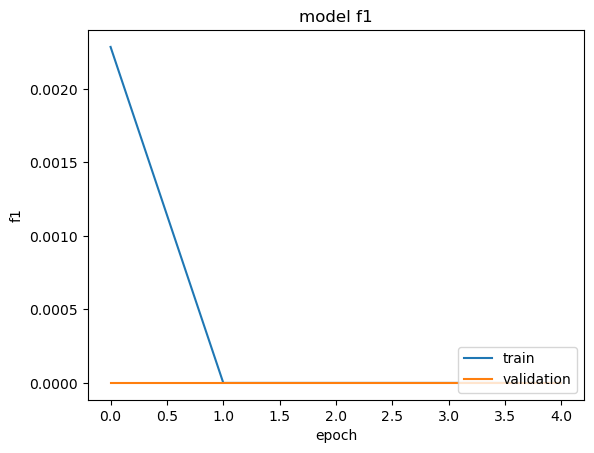

In [7]:
# Run tests for various filter sizes
for filter_size in [3, 5, 7, 11, 13, 15]:
    get_dataset_layer_study_standard([1806], study_name, dataset, default_data_training_num_epocs, filter_size)

In [8]:
########################################################################
# get_dataset_layer_study_dense: Automates dense layer variations 
# while keeping convolutional structure fixed.
#
# Inputs:
#   - assay: Assay ID.
#   - p_output_subfolder: Output folder name.
#   - dataset: Full dataset.
#   - p_epocs: Number of training epochs.
#   - p_neurons: Number of neurons in dense layers.
########################################################################
def get_dataset_layer_study_dense(assay, p_output_subfolder, dataset, p_epocs, p_neurons):
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, 7], [32, 7]],
                            p_dense=[[p_neurons, 0], [p_neurons, 0]])
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, 7], [32, 7]],
                            p_dense=[[p_neurons, 0], [p_neurons, 0], [p_neurons, 0]])
    get_dataset_layer_study(assay, p_output_subfolder, dataset, p_epocs, 
                            p_conv_extr=[[16, 7], [32, 7]],
                            p_dense=[[p_neurons, 0]])


In [9]:
########################################################################
# Run dense layer neuron count study (study_dense).
########################################################################
study_name = 'study_dense'
global_overview_folder = model_folder + '/' + study_name
create_global_overview_file(global_overview_folder)

Creating model model_1806#16_7#32_7##16_0#16_0
Output folder Model/study_dense
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_dense
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_7#32_7##16_0#16_0
                    , [[16, 7], [32, 7]]
                    , [[16, 0], [16, 0]]
                     )
[ 06/05/2025, 20:09:23 ]: Training dataset for assays [1806]
[ 06/05/2025, 20:09:23 ]: Creating model
[ 06/05/2025, 20:09:23 ]: x = layers.Conv2D(16, 7, activation='relu')(img_input) 
[ 06/05/2025, 20:09:23 ]: x = layers.Conv2D(32, 7, activation='relu')(img_input) 
[ 06/05/2025, 20:09:23 ]: x = layers.Dense(16, activation='relu')(x) 
[ 06/05/2025, 20:09:23 ]: x = layers.Dense(16, activation='relu')(x) 
[ 06/05/2025, 20:09:23 ]: Getting datasets from ModelDataset/dataset

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 159s 516ms/step - loss: 0.4285 - acc: 0.9112 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1: 0.0000e+00 - val_loss: 0.1631 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 18s 58ms/step - loss: 0.2176 - acc: 0.9245 - precision: 0.2280 - recall: 0.1737 - f1: 0.1875 - val_loss: 0.2427 - val_acc: 0.9094 - val_precision: 0.0439 - val_recall: 0.0257 - val_f1: 0.0320
Epoch 3/5
307/307 [==============================] - 18s 59ms/step - loss: 0.1393 - acc: 0.9545 - precision: 0.5340 - recall: 0.4791 - f1: 0.4824 - val_loss: 0.1608 - val_acc: 0.9610 - val_precision: 0.0457 - val_recall: 0.0109 - val_f1: 0.0169
Epoch 4/5
307/307 [==============================] - 18s 59ms/step - loss: 0.0682 - acc: 0.9802 - precision: 0.6614 - recall: 0.6332 - f1: 0.6356 - val_loss: 0.1837 - val_acc: 0.9588 - val_precision: 0.0411 - val_recall: 0.0094 - val_f1: 0

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 141s 457ms/step - loss: 0.2885 - acc: 0.9127 - precision: 0.0065 - recall: 0.0054 - f1: 0.0059 - val_loss: 0.2273 - val_acc: 0.9567 - val_precision: 0.0046 - val_recall: 3.0441e-04 - val_f1: 5.7078e-04
Epoch 2/5
307/307 [==============================] - 19s 61ms/step - loss: 0.1722 - acc: 0.9449 - precision: 0.4619 - recall: 0.4069 - f1: 0.4130 - val_loss: 0.1601 - val_acc: 0.9619 - val_precision: 0.0457 - val_recall: 0.0106 - val_f1: 0.0167
Epoch 3/5
307/307 [==============================] - 18s 57ms/step - loss: 0.1253 - acc: 0.9576 - precision: 0.5361 - recall: 0.5087 - f1: 0.5039 - val_loss: 0.1831 - val_acc: 0.9567 - val_precision: 0.0457 - val_recall: 0.0124 - val_f1: 0.0188
Epoch 4/5
307/307 [==============================] - 18s 60ms/step - loss: 0.0822 - acc: 0.9726 - precision: 0.6285 - recall: 0.6249 - f1: 0.6120 - val_loss: 0.2251 - val_acc: 0.9472 - val_precision: 0.0457 - val_recall: 0.0151 - val_f1: 0.0223
Epoch 5/5


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 126s 398ms/step - loss: 0.3259 - acc: 0.9075 - precision: 9.1515e-04 - recall: 0.0065 - f1: 0.0016 - val_loss: 0.2590 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 19s 60ms/step - loss: 0.1649 - acc: 0.9451 - precision: 0.3939 - recall: 0.3259 - f1: 0.3439 - val_loss: 0.1458 - val_acc: 0.9600 - val_precision: 0.0457 - val_recall: 0.0118 - val_f1: 0.0182
Epoch 3/5
307/307 [==============================] - 18s 58ms/step - loss: 0.1239 - acc: 0.9667 - precision: 0.5844 - recall: 0.5206 - f1: 0.5366 - val_loss: 0.1637 - val_acc: 0.9573 - val_precision: 0.0457 - val_recall: 0.0127 - val_f1: 0.0195
Epoch 4/5
307/307 [==============================] - 18s 59ms/step - loss: 0.0695 - acc: 0.9785 - precision: 0.6499 - recall: 0.6388 - f1: 0.6315 - val_loss: 0.1853 - val_acc: 0.9597 - val_precision: 0.0457 - val_recall: 0.0134 - val_f1: 0.0200
Ep

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 143s 434ms/step - loss: 0.5627 - acc: 0.9153 - precision: 0.1498 - recall: 0.1251 - f1: 0.1282 - val_loss: 0.2088 - val_acc: 0.9494 - val_precision: 0.0457 - val_recall: 0.0158 - val_f1: 0.0228
Epoch 2/5
307/307 [==============================] - 19s 61ms/step - loss: 0.1509 - acc: 0.9552 - precision: 0.5219 - recall: 0.4601 - f1: 0.4720 - val_loss: 0.1422 - val_acc: 0.9582 - val_precision: 0.0457 - val_recall: 0.0140 - val_f1: 0.0208
Epoch 3/5
307/307 [==============================] - 18s 60ms/step - loss: 0.0634 - acc: 0.9798 - precision: 0.6687 - recall: 0.6395 - f1: 0.6411 - val_loss: 0.1353 - val_acc: 0.9658 - val_precision: 0.0457 - val_recall: 0.0131 - val_f1: 0.0194
Epoch 4/5
307/307 [==============================] - 18s 59ms/step - loss: 0.0276 - acc: 0.9933 - precision: 0.7188 - recall: 0.7087 - f1: 0.7102 - val_loss: 0.3516 - val_acc: 0.9597 - val_precision: 0.0457 - val_recall: 0.0149 - val_f1: 0.0215
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 155s 455ms/step - loss: 0.3415 - acc: 0.9038 - precision: 6.5147e-04 - recall: 0.0065 - f1: 0.0012 - val_loss: 0.1508 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 19s 60ms/step - loss: 0.2049 - acc: 0.9256 - precision: 0.1786 - recall: 0.1393 - f1: 0.1490 - val_loss: 0.1385 - val_acc: 0.9631 - val_precision: 0.0457 - val_recall: 0.0134 - val_f1: 0.0201
Epoch 3/5
307/307 [==============================] - 18s 60ms/step - loss: 0.1404 - acc: 0.9532 - precision: 0.5082 - recall: 0.4536 - f1: 0.4621 - val_loss: 0.1712 - val_acc: 0.9448 - val_precision: 0.0457 - val_recall: 0.0179 - val_f1: 0.0253
Epoch 4/5
307/307 [==============================] - 19s 60ms/step - loss: 0.0684 - acc: 0.9787 - precision: 0.6422 - recall: 0.6105 - f1: 0.6160 - val_loss: 0.1558 - val_acc: 0.9533 - val_precision: 0.0434 - val_recall: 0.0155 - val_f1: 0.0223
Ep

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 139s 440ms/step - loss: 0.4924 - acc: 0.9110 - precision: 4.6533e-04 - recall: 0.0033 - f1: 8.1433e-04 - val_loss: 0.1950 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/5
307/307 [==============================] - 19s 60ms/step - loss: 0.1815 - acc: 0.9349 - precision: 0.2834 - recall: 0.2359 - f1: 0.2479 - val_loss: 0.2317 - val_acc: 0.9567 - val_precision: 0.0046 - val_recall: 3.0441e-04 - val_f1: 5.7078e-04
Epoch 3/5
307/307 [==============================] - 18s 60ms/step - loss: 0.1390 - acc: 0.9584 - precision: 0.5511 - recall: 0.4954 - f1: 0.5042 - val_loss: 0.1712 - val_acc: 0.9329 - val_precision: 0.0457 - val_recall: 0.0182 - val_f1: 0.0255
Epoch 4/5
307/307 [==============================] - 18s 59ms/step - loss: 0.1079 - acc: 0.9695 - precision: 0.6379 - recall: 0.5917 - f1: 0.6018 - val_loss: 0.1748 - val_acc: 0.9533 - val_precision: 0.0457 - val_recall: 0.0170 - val_f

/home/manager/proyectos/Publication1_Entrega/data_training.ipynb:488: RuntimeWarning: invalid value encountered in long_scalars
  "########################################################################\n",


Creating model model_1806#16_7#32_7##64_0#64_0
Output folder Model/study_dense
train_assay_model(ModelDataset
                    , [1806]
                    , Model/study_dense
                    , 1
                    , 5
                    , ['acc', <function precision at 0x7fb7d54c1790>, <function recall at 0x7fb7d54c1820>, <function f1 at 0x7fb7d54c18b0>]
                    , model_1806#16_7#32_7##64_0#64_0
                    , [[16, 7], [32, 7]]
                    , [[64, 0], [64, 0]]
                     )
[ 06/05/2025, 20:50:13 ]: Training dataset for assays [1806]
[ 06/05/2025, 20:50:13 ]: Creating model
[ 06/05/2025, 20:50:13 ]: x = layers.Conv2D(16, 7, activation='relu')(img_input) 
[ 06/05/2025, 20:50:13 ]: x = layers.Conv2D(32, 7, activation='relu')(img_input) 
[ 06/05/2025, 20:50:13 ]: x = layers.Dense(64, activation='relu')(x) 
[ 06/05/2025, 20:50:13 ]: x = layers.Dense(64, activation='relu')(x) 
[ 06/05/2025, 20:50:13 ]: Getting datasets from ModelDataset/dataset

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 184s 571ms/step - loss: 0.4216 - acc: 0.9234 - precision: 0.2303 - recall: 0.1754 - f1: 0.1849 - val_loss: 0.1618 - val_acc: 0.9649 - val_precision: 0.0411 - val_recall: 0.0091 - val_f1: 0.0144
Epoch 2/5
307/307 [==============================] - 19s 63ms/step - loss: 0.1353 - acc: 0.9613 - precision: 0.5535 - recall: 0.5105 - f1: 0.5143 - val_loss: 0.2206 - val_acc: 0.9228 - val_precision: 0.0445 - val_recall: 0.0203 - val_f1: 0.0272
Epoch 3/5
307/307 [==============================] - 19s 63ms/step - loss: 0.1189 - acc: 0.9771 - precision: 0.6732 - recall: 0.6409 - f1: 0.6453 - val_loss: 0.1809 - val_acc: 0.9597 - val_precision: 0.0457 - val_recall: 0.0164 - val_f1: 0.0234
Epoch 4/5
307/307 [==============================] - 19s 62ms/step - loss: 0.0359 - acc: 0.9917 - precision: 0.6713 - recall: 0.6557 - f1: 0.6591 - val_loss: 0.2327 - val_acc: 0.9604 - val_precision: 0.0457 - val_recall: 0.0167 - val_f1: 0.0237
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 145s 445ms/step - loss: 0.3310 - acc: 0.9066 - precision: 0.0327 - recall: 0.0282 - f1: 0.0263 - val_loss: 0.1500 - val_acc: 0.9567 - val_precision: 0.0046 - val_recall: 3.0441e-04 - val_f1: 5.7078e-04
Epoch 2/5
307/307 [==============================] - 19s 63ms/step - loss: 0.1761 - acc: 0.9417 - precision: 0.4726 - recall: 0.3840 - f1: 0.4027 - val_loss: 0.1565 - val_acc: 0.9506 - val_precision: 0.0457 - val_recall: 0.0148 - val_f1: 0.0218
Epoch 3/5
307/307 [==============================] - 19s 62ms/step - loss: 0.1045 - acc: 0.9687 - precision: 0.5936 - recall: 0.5425 - f1: 0.5519 - val_loss: 0.1679 - val_acc: 0.9597 - val_precision: 0.0457 - val_recall: 0.0130 - val_f1: 0.0198
Epoch 4/5
307/307 [==============================] - 19s 63ms/step - loss: 0.0456 - acc: 0.9865 - precision: 0.7227 - recall: 0.7096 - f1: 0.7075 - val_loss: 0.2252 - val_acc: 0.9640 - val_precision: 0.0457 - val_recall: 0.0112 - val_f1: 0.0175
Epoch 5/5


/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 171s 532ms/step - loss: 0.4756 - acc: 0.9203 - precision: 0.2375 - recall: 0.1936 - f1: 0.1986 - val_loss: 0.1734 - val_acc: 0.9533 - val_precision: 0.0457 - val_recall: 0.0158 - val_f1: 0.0230
Epoch 2/5
307/307 [==============================] - 20s 65ms/step - loss: 0.1490 - acc: 0.9569 - precision: 0.5352 - recall: 0.4990 - f1: 0.5000 - val_loss: 0.1753 - val_acc: 0.9512 - val_precision: 0.0457 - val_recall: 0.0158 - val_f1: 0.0232
Epoch 3/5
307/307 [==============================] - 20s 65ms/step - loss: 0.0766 - acc: 0.9798 - precision: 0.6496 - recall: 0.6310 - f1: 0.6302 - val_loss: 0.1902 - val_acc: 0.9579 - val_precision: 0.0457 - val_recall: 0.0148 - val_f1: 0.0219
Epoch 4/5
307/307 [==============================] - 19s 62ms/step - loss: 0.0521 - acc: 0.9889 - precision: 0.6999 - recall: 0.6957 - f1: 0.6917 - val_loss: 0.2369 - val_acc: 0.9518 - val_precision: 0.0457 - val_recall: 0.0164 - val_f1: 0.0237
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 160s 509ms/step - loss: 0.3825 - acc: 0.9219 - precision: 0.2494 - recall: 0.2119 - f1: 0.2165 - val_loss: 0.1477 - val_acc: 0.9661 - val_precision: 0.0457 - val_recall: 0.0109 - val_f1: 0.0168
Epoch 2/5
307/307 [==============================] - 22s 70ms/step - loss: 0.2005 - acc: 0.9478 - precision: 0.4988 - recall: 0.4502 - f1: 0.4519 - val_loss: 0.1668 - val_acc: 0.9661 - val_precision: 0.0457 - val_recall: 0.0118 - val_f1: 0.0181
Epoch 3/5
307/307 [==============================] - 21s 69ms/step - loss: 0.1263 - acc: 0.9752 - precision: 0.6397 - recall: 0.6024 - f1: 0.6111 - val_loss: 0.1902 - val_acc: 0.9539 - val_precision: 0.0457 - val_recall: 0.0137 - val_f1: 0.0205
Epoch 4/5
307/307 [==============================] - 21s 70ms/step - loss: 0.1431 - acc: 0.9798 - precision: 0.6643 - recall: 0.6504 - f1: 0.6479 - val_loss: 0.3007 - val_acc: 0.9564 - val_precision: 0.0457 - val_recall: 0.0164 - val_f1: 0.0234
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 156s 469ms/step - loss: 0.4971 - acc: 0.9142 - precision: 0.1623 - recall: 0.1230 - f1: 0.1306 - val_loss: 0.1711 - val_acc: 0.9610 - val_precision: 0.0457 - val_recall: 0.0103 - val_f1: 0.0163
Epoch 2/5
307/307 [==============================] - 21s 69ms/step - loss: 0.1743 - acc: 0.9512 - precision: 0.4790 - recall: 0.4044 - f1: 0.4232 - val_loss: 0.2768 - val_acc: 0.9640 - val_precision: 0.0365 - val_recall: 0.0079 - val_f1: 0.0125
Epoch 3/5
307/307 [==============================] - 21s 68ms/step - loss: 0.1561 - acc: 0.9708 - precision: 0.6000 - recall: 0.5460 - f1: 0.5588 - val_loss: 0.1751 - val_acc: 0.9643 - val_precision: 0.0457 - val_recall: 0.0148 - val_f1: 0.0217
Epoch 4/5
307/307 [==============================] - 21s 68ms/step - loss: 0.1462 - acc: 0.9811 - precision: 0.6738 - recall: 0.6562 - f1: 0.6566 - val_loss: 0.2205 - val_acc: 0.9655 - val_precision: 0.0411 - val_recall: 0.0107 - val_f1: 0.0164
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 186s 575ms/step - loss: 0.3544 - acc: 0.9171 - precision: 0.2441 - recall: 0.2053 - f1: 0.2071 - val_loss: 0.1592 - val_acc: 0.9616 - val_precision: 0.0320 - val_recall: 0.0055 - val_f1: 0.0091
Epoch 2/5
307/307 [==============================] - 21s 68ms/step - loss: 0.1490 - acc: 0.9608 - precision: 0.5328 - recall: 0.4864 - f1: 0.4915 - val_loss: 1.1350 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 22s 71ms/step - loss: 0.0966 - acc: 0.9737 - precision: 0.6412 - recall: 0.6218 - f1: 0.6186 - val_loss: 0.1530 - val_acc: 0.9597 - val_precision: 0.0457 - val_recall: 0.0142 - val_f1: 0.0207
Epoch 4/5
307/307 [==============================] - 21s 69ms/step - loss: 0.0411 - acc: 0.9898 - precision: 0.7041 - recall: 0.6896 - f1: 0.6906 - val_loss: 0.2225 - val_acc: 0.9503 - val_precision: 0.0457 - val_recall: 0.0161 - val_f1: 0.0233
Epoch 

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 159s 466ms/step - loss: 0.4758 - acc: 0.9147 - precision: 0.1833 - recall: 0.1441 - f1: 0.1489 - val_loss: 0.1581 - val_acc: 0.9576 - val_precision: 0.0457 - val_recall: 0.0121 - val_f1: 0.0182
Epoch 2/5
307/307 [==============================] - 24s 78ms/step - loss: 0.1575 - acc: 0.9552 - precision: 0.5390 - recall: 0.4657 - f1: 0.4835 - val_loss: 0.1426 - val_acc: 0.9637 - val_precision: 0.0457 - val_recall: 0.0140 - val_f1: 0.0206
Epoch 3/5
307/307 [==============================] - 24s 78ms/step - loss: 0.0745 - acc: 0.9811 - precision: 0.6645 - recall: 0.6465 - f1: 0.6452 - val_loss: 0.1810 - val_acc: 0.9558 - val_precision: 0.0457 - val_recall: 0.0193 - val_f1: 0.0266
Epoch 4/5
307/307 [==============================] - 24s 79ms/step - loss: 0.0591 - acc: 0.9893 - precision: 0.6834 - recall: 0.6732 - f1: 0.6725 - val_loss: 0.2620 - val_acc: 0.9594 - val_precision: 0.0457 - val_recall: 0.0137 - val_f1: 0.0199
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 142s 449ms/step - loss: 0.4507 - acc: 0.9125 - precision: 0.1378 - recall: 0.1226 - f1: 0.1164 - val_loss: 0.2993 - val_acc: 0.9604 - val_precision: 0.0365 - val_recall: 0.0040 - val_f1: 0.0070
Epoch 2/5
307/307 [==============================] - 24s 79ms/step - loss: 0.2368 - acc: 0.9408 - precision: 0.4581 - recall: 0.3726 - f1: 0.3911 - val_loss: 0.1590 - val_acc: 0.9457 - val_precision: 0.0411 - val_recall: 0.0070 - val_f1: 0.0117
Epoch 3/5
307/307 [==============================] - 24s 79ms/step - loss: 0.1103 - acc: 0.9708 - precision: 0.6323 - recall: 0.5798 - f1: 0.5899 - val_loss: 0.1669 - val_acc: 0.9600 - val_precision: 0.0457 - val_recall: 0.0118 - val_f1: 0.0180
Epoch 4/5
307/307 [==============================] - 24s 79ms/step - loss: 0.0751 - acc: 0.9808 - precision: 0.6534 - recall: 0.6181 - f1: 0.6250 - val_loss: 0.1718 - val_acc: 0.9610 - val_precision: 0.0457 - val_recall: 0.0103 - val_f1: 0.0161
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 170s 522ms/step - loss: 0.5203 - acc: 0.9173 - precision: 0.1848 - recall: 0.1423 - f1: 0.1496 - val_loss: 0.1717 - val_acc: 0.9631 - val_precision: 0.0457 - val_recall: 0.0100 - val_f1: 0.0158
Epoch 2/5
307/307 [==============================] - 24s 79ms/step - loss: 0.1786 - acc: 0.9519 - precision: 0.5234 - recall: 0.4783 - f1: 0.4799 - val_loss: 0.1737 - val_acc: 0.9475 - val_precision: 0.0457 - val_recall: 0.0152 - val_f1: 0.0222
Epoch 3/5
307/307 [==============================] - 24s 79ms/step - loss: 0.1038 - acc: 0.9693 - precision: 0.5786 - recall: 0.5434 - f1: 0.5476 - val_loss: 0.2121 - val_acc: 0.9634 - val_precision: 0.0457 - val_recall: 0.0109 - val_f1: 0.0168
Epoch 4/5
307/307 [==============================] - 24s 79ms/step - loss: 0.0933 - acc: 0.9826 - precision: 0.6662 - recall: 0.6583 - f1: 0.6536 - val_loss: 0.1803 - val_acc: 0.9634 - val_precision: 0.0457 - val_recall: 0.0140 - val_f1: 0.0206
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 169s 510ms/step - loss: 1.8825 - acc: 0.9201 - precision: 0.1826 - recall: 0.1341 - f1: 0.1447 - val_loss: 0.1798 - val_acc: 0.9607 - val_precision: 0.0457 - val_recall: 0.0109 - val_f1: 0.0169
Epoch 2/5
307/307 [==============================] - 30s 99ms/step - loss: 0.1727 - acc: 0.9519 - precision: 0.4985 - recall: 0.4320 - f1: 0.4443 - val_loss: 0.1594 - val_acc: 0.9643 - val_precision: 0.0457 - val_recall: 0.0118 - val_f1: 0.0178
Epoch 3/5
307/307 [==============================] - 30s 98ms/step - loss: 0.1760 - acc: 0.9706 - precision: 0.6219 - recall: 0.5803 - f1: 0.5849 - val_loss: 0.2273 - val_acc: 0.9628 - val_precision: 0.0457 - val_recall: 0.0145 - val_f1: 0.0214
Epoch 4/5
307/307 [==============================] - 31s 100ms/step - loss: 0.1513 - acc: 0.9819 - precision: 0.6810 - recall: 0.6604 - f1: 0.6608 - val_loss: 0.1873 - val_acc: 0.9582 - val_precision: 0.0457 - val_recall: 0.0161 - val_f1: 0.0231
Epoch 5/5
12/12 [

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 160s 492ms/step - loss: 0.6012 - acc: 0.9166 - precision: 0.1458 - recall: 0.1126 - f1: 0.1181 - val_loss: 0.2222 - val_acc: 0.9576 - val_precision: 0.0457 - val_recall: 0.0070 - val_f1: 0.0118
Epoch 2/5
307/307 [==============================] - 30s 99ms/step - loss: 0.2730 - acc: 0.9462 - precision: 0.4589 - recall: 0.4030 - f1: 0.4077 - val_loss: 0.2323 - val_acc: 0.9619 - val_precision: 0.0457 - val_recall: 0.0131 - val_f1: 0.0195
Epoch 3/5
307/307 [==============================] - 30s 99ms/step - loss: 0.2041 - acc: 0.9660 - precision: 0.5816 - recall: 0.5466 - f1: 0.5506 - val_loss: 0.2333 - val_acc: 0.9360 - val_precision: 0.0457 - val_recall: 0.0209 - val_f1: 0.0283
Epoch 4/5
307/307 [==============================] - 30s 99ms/step - loss: 0.1027 - acc: 0.9806 - precision: 0.6832 - recall: 0.6596 - f1: 0.6620 - val_loss: 1.0587 - val_acc: 0.9646 - val_precision: 0.0411 - val_recall: 0.0091 - val_f1: 0.0144
Epoch 5/5
12/12 [=

/home/manager/anaconda3/envs/tf-gpu-2.5/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
307/307 [==============================] - 149s 446ms/step - loss: 1.2627 - acc: 0.9199 - precision: 0.2689 - recall: 0.2089 - f1: 0.2164 - val_loss: 0.1763 - val_acc: 0.9646 - val_precision: 0.0411 - val_recall: 0.0094 - val_f1: 0.0147
Epoch 2/5
307/307 [==============================] - 31s 101ms/step - loss: 0.2277 - acc: 0.9519 - precision: 0.4983 - recall: 0.4420 - f1: 0.4522 - val_loss: 1.3201 - val_acc: 0.9564 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/5
307/307 [==============================] - 31s 100ms/step - loss: 0.1280 - acc: 0.9691 - precision: 0.6548 - recall: 0.6067 - f1: 0.6155 - val_loss: 0.1763 - val_acc: 0.9649 - val_precision: 0.0457 - val_recall: 0.0131 - val_f1: 0.0193
Epoch 4/5
307/307 [==============================] - 31s 100ms/step - loss: 0.1348 - acc: 0.9850 - precision: 0.7127 - recall: 0.6954 - f1: 0.6972 - val_loss: 0.2786 - val_acc: 0.9637 - val_precision: 0.0411 - val_recall: 0.0128 - val_f1: 0.0189
Epo

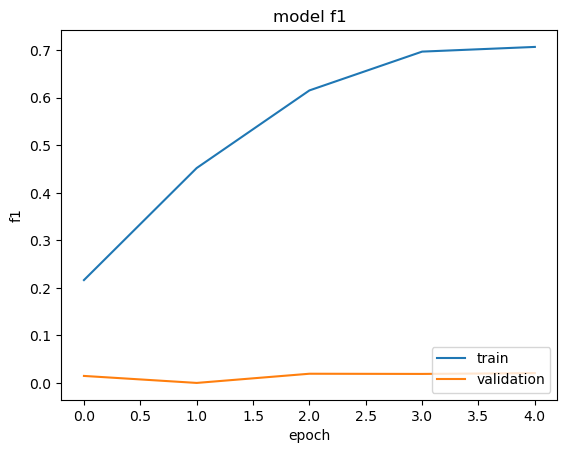

In [10]:
# Run tests for different neuron counts
for neurons in [16, 32, 64, 128, 256, 512]:
    get_dataset_layer_study_dense([1806], study_name, dataset, default_data_training_num_epocs, neurons)